___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [111]:
classes = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
           ]


# Import Libraries

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from collections import Counter

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

#One-hot encoding
from keras.utils import to_categorical

#modeling
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization

from sklearn.metrics import multilabel_confusion_matrix, classification_report



# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train,y_train, stratify=y_train ,test_size=0.10, random_state=13
)

In [5]:
print("X_train Shape :", x_train.shape)
print("X_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)
print("X_val Shape:", x_val.shape)
print("y_val Shape:", y_val.shape)


X_train Shape : (54000, 28, 28)
X_test Shape: (10000, 28, 28)
y_train Shape: (54000,)
y_test Shape: (10000,)
X_val Shape: (6000, 28, 28)
y_val Shape: (6000,)


In [ ]:
# represents the labels of the training dataset and counting the occurrences of each unique element
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

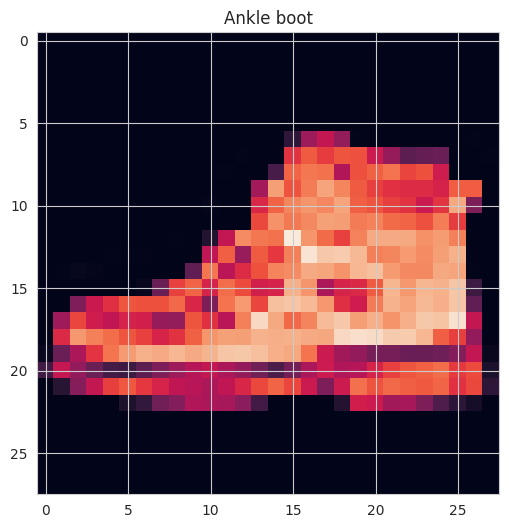

In [ ]:
plt.imshow(x_train[15])
plt.title(classes[y_train[15]])
plt.show()

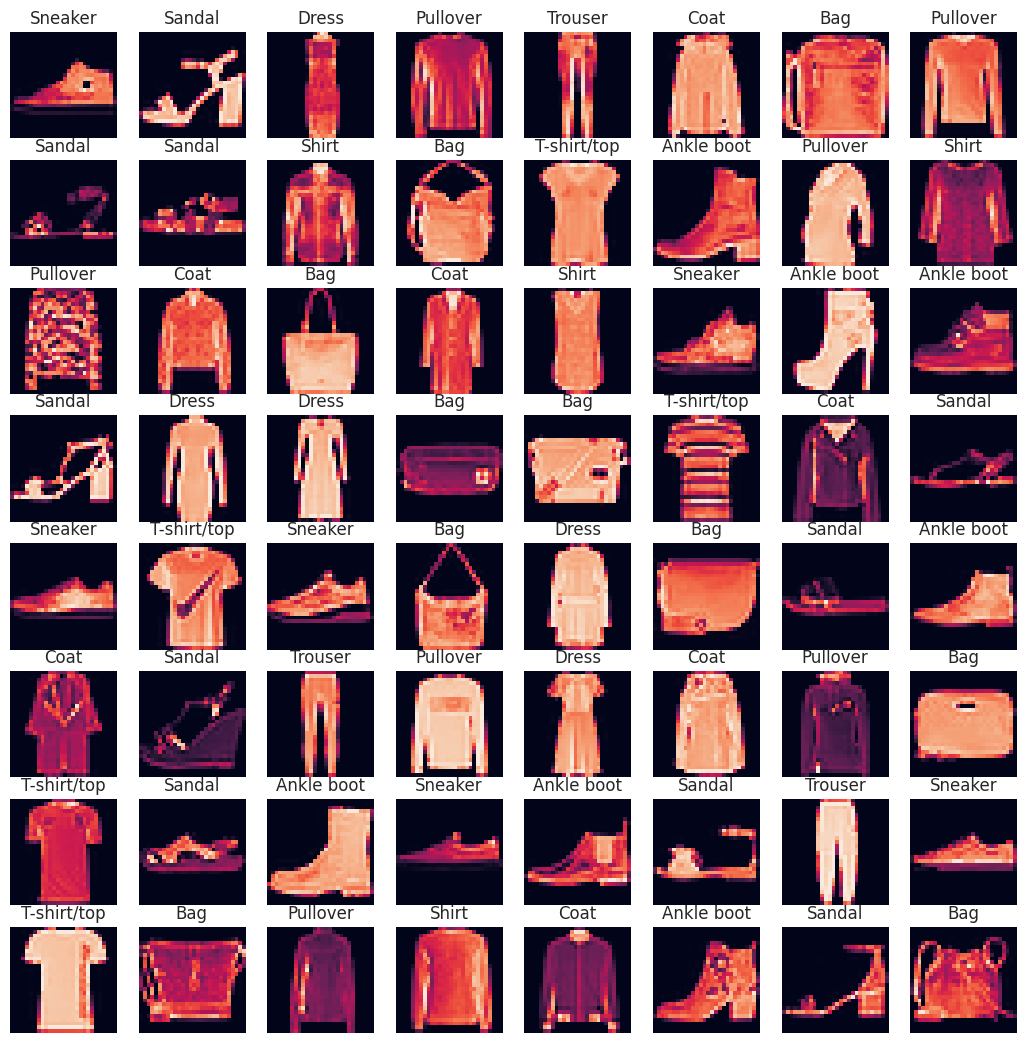

In [ ]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
print("Max Values ", x_train.max())
print("Min Values :", x_train.min())

Max Values  255
Min Values : 0


In [7]:
# Normalizing the data to ensure that all features contribute equally to the learning process
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val/255.0

In [8]:
print("Max Values After normalize", x_train.max())
print("Min Values After normalize:", x_train.min())

Max Values After normalize 1.0
Min Values After normalize: 0.0


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
# Reshaping the training and testing data to match the expected input shape for a CNN.

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Reshaping training data
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)     # Reshaping testing data
x_val = x_val.reshape(x_val.shape[0],28,28,1)           # Reshaping valdation data


In [10]:
print("X_train Shape :", x_train.shape)
print("X_test Shape:", x_test.shape)
print("X_val Shape:", x_val.shape)

X_train Shape : (54000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)
X_val Shape: (6000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [11]:
print('''
Shape of y_train before encoding {}
Shape of y_test before encoding  {}
Shape of y_val  before encoding  {}
'''.format(y_train[10], y_test[10],y_val[10])
)


Shape of y_train before encoding 7
Shape of y_test before encoding  4
Shape of y_val  before encoding  1



In [12]:
# Performing one-hot encoding on the class labels for both training and testing datasets.
# each integer is mapped to a binary vector

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [13]:
# each integer is mapped to a binary vector
y_train[1738]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [14]:
model1 = Sequential()

model1.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607394 (2.32 MB)
Trainable params: 607394 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",patience=6 ,restore_best_weights = True)

In [17]:

model1.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=200,
    validation_data=(x_val, y_val), # need to be changed to validation split 0.1
    callbacks=[early_stop],
)

Epoch 1/200
540/540 [==============================] - 27s 48ms/step - loss: 0.5144 - accuracy: 0.8154 - val_loss: 0.3865 - val_accuracy: 0.8643
Epoch 2/200
540/540 [==============================] - 25s 46ms/step - loss: 0.3280 - accuracy: 0.8824 - val_loss: 0.3041 - val_accuracy: 0.8928
Epoch 3/200
540/540 [==============================] - 28s 51ms/step - loss: 0.2803 - accuracy: 0.8989 - val_loss: 0.2909 - val_accuracy: 0.8932
Epoch 4/200
540/540 [==============================] - 25s 46ms/step - loss: 0.2497 - accuracy: 0.9094 - val_loss: 0.2641 - val_accuracy: 0.9017
Epoch 5/200
540/540 [==============================] - 24s 45ms/step - loss: 0.2245 - accuracy: 0.9187 - val_loss: 0.2487 - val_accuracy: 0.9098
Epoch 6/200
540/540 [==============================] - 25s 46ms/step - loss: 0.2049 - accuracy: 0.9258 - val_loss: 0.2409 - val_accuracy: 0.9133
Epoch 7/200
540/540 [==============================] - 24s 44ms/step - loss: 0.1872 - accuracy: 0.9318 - val_loss: 0.2566 - val_ac

**TASK 7: Plot values of metrics you used in your model.**

In [18]:
loss_df1 = pd.DataFrame(model1.history.history)

In [19]:

print('First Model ')
print(loss_df1.tail(10))



First Model 
    loss  accuracy  val_loss  val_accuracy
2  0.280     0.899     0.291         0.893
3  0.250     0.909     0.264         0.902
4  0.224     0.919     0.249         0.910
5  0.205     0.926     0.241         0.913
6  0.187     0.932     0.257         0.907
7  0.172     0.937     0.259         0.907
8  0.158     0.942     0.241         0.916
9  0.144     0.948     0.265         0.911
10 0.132     0.952     0.251         0.918
11 0.121     0.956     0.258         0.917


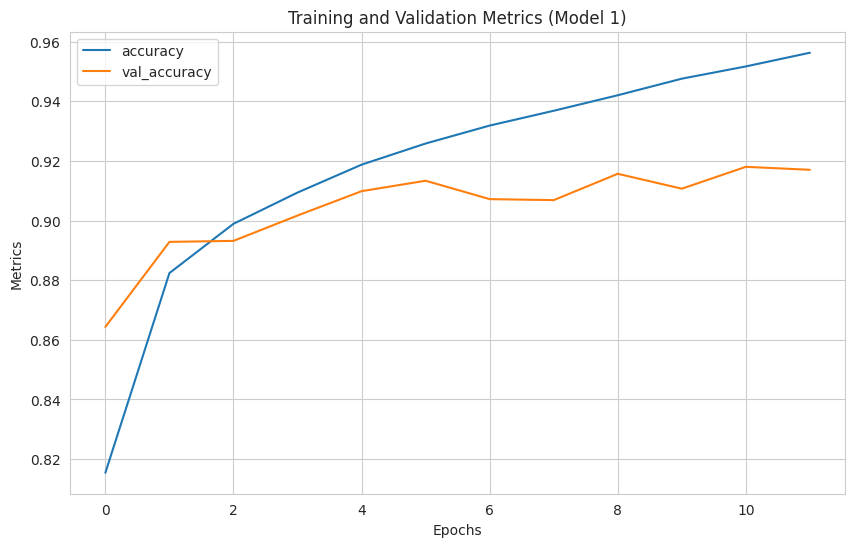

In [23]:
loss_df1[["accuracy", "val_accuracy"]].plot()

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Training and Validation Metrics (Model 1)')
plt.show()

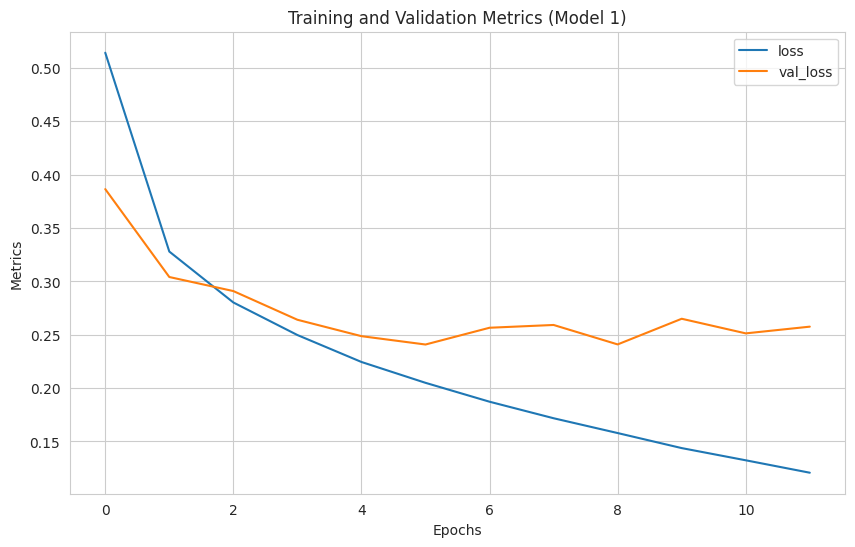

In [24]:
loss_df1[["loss", "val_loss"]].plot()

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Training and Validation Metrics (Model 1)')
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

#model 1

In [25]:
score = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25878435373306274
Test accuracy: 0.9074000120162964


In [27]:
pred_prob = model1.predict(x_test)
pred_prob

313/313 [==============================] - 3s 9ms/step


array([[3.1519096e-07, 7.6844797e-09, 7.1046992e-07, ..., 1.1433749e-03,
        1.5642463e-05, 9.9866939e-01],
       [3.4374659e-06, 1.2450724e-13, 9.9977136e-01, ..., 9.6723937e-15,
        6.1442677e-11, 6.1374746e-11],
       [1.3732438e-07, 9.9999946e-01, 1.4529283e-10, ..., 1.8040739e-11,
        2.7478429e-11, 1.6850807e-12],
       ...,
       [8.4245257e-06, 1.5824353e-10, 3.1276741e-05, ..., 1.2534814e-07,
        9.9922115e-01, 6.2782166e-09],
       [1.4515265e-07, 9.9997681e-01, 7.7259230e-09, ..., 5.8125071e-10,
        3.0061517e-10, 1.1197348e-08],
       [9.0747475e-05, 1.7676313e-06, 3.8724830e-03, ..., 2.2386782e-01,
        7.9711610e-03, 3.1796447e-03]], dtype=float32)

In [28]:

rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

2

In [29]:
y_preds = model1.predict(x_test)
y_preds = [np.argmax(i) for i in y_preds]

y_test = [np.argmax(i) for i in y_test]

313/313 [==============================] - 2s 7ms/step


In [30]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.89      0.85      1000
           3       0.87      0.94      0.90      1000
           4       0.87      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.69      0.73      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



-------------------------------------------------------------


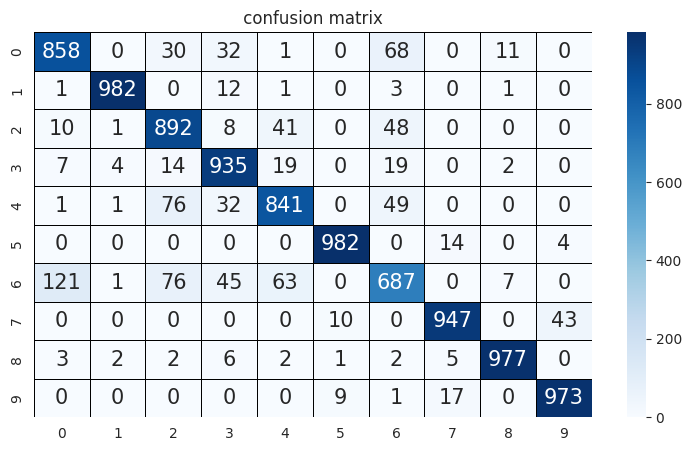

In [33]:
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
    confusion_matrix(y_test, y_preds),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},)
plt.title(" confusion matrix ")
plt.show();

#My Experiment
#model 2
1.  Add dropout layer
2.  Adding more hidden layers




## Prediction

In [98]:
My_clothe = x_test[40]

In [99]:
My_clothe.shape

(28, 28, 1)

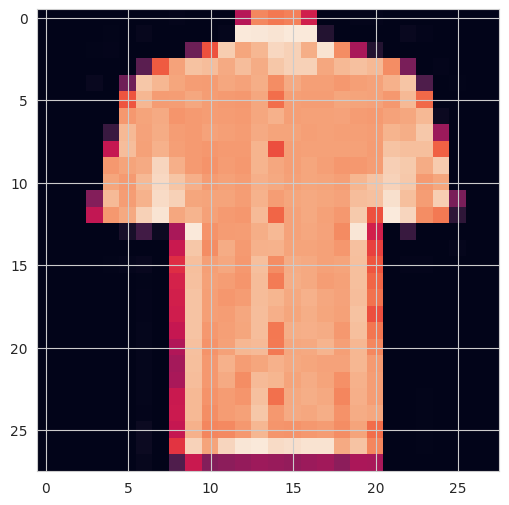

In [101]:
plt.imshow(My_clothe)
plt.show()

In [106]:
My_clothe.shape

(28, 28, 1)

In [107]:
np.expand_dims(My_clothe, 0).shape

(1, 28, 28, 1)

In [108]:
pred_prob = model1.predict(np.expand_dims(My_clothe, 0))
pred_prob

1/1 [==============================] - 0s 23ms/step


array([[9.0184641e-01, 2.1397429e-07, 8.0931158e-04, 2.6765891e-04,
        1.0043720e-04, 6.2434991e-09, 9.6970774e-02, 3.8150041e-08,
        2.7376827e-06, 2.5034828e-06]], dtype=float32)

In [109]:
y_pred = np.argmax(pred_prob)
y_pred

0

In [112]:
classes[int(y_pred)]

'T-shirt/top'

# Load the Saved Model and Get Predictions

In [113]:
model1.save("cnn_fashion_image.h5")

In [118]:
from keras.models import load_model
model1 =load_model("cnn_fashion_image.h5")

In [135]:
x_test[15].shape

(28, 28, 1)

In [137]:
np.expand_dims(x_test[15], axis=0).shape

(1, 28, 28, 1)

In [147]:
pred = model1.predict(np.expand_dims(x_test[15], axis=0))

1/1 [==============================] - 0s 21ms/step


In [148]:
np.argmax(pred)

1

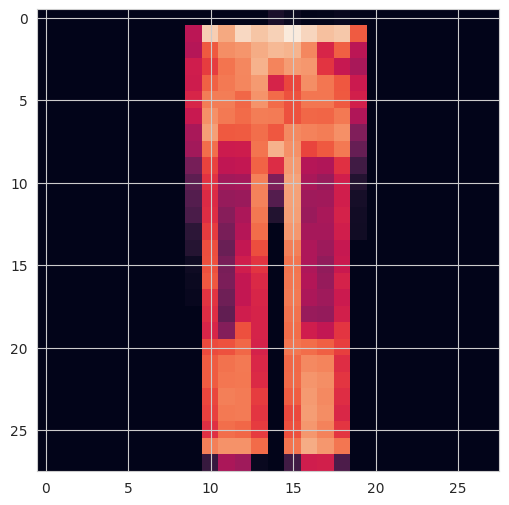

In [150]:
plt.imshow(x_test[15])
plt.show()

In [151]:
classes[1]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___